# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `8` | `Questions`

> Hi, Team. 👋

> As discussed, throughout our semester, I’ve been doing my best to pace your learning while expanding your expertise and providing a novel framework that you could deploy in real-world practices. I kept revising all the lecture materials and exercise problem-sets so they aligned with your level of understanding.

> This week’s exercise questions, as always, are intended to help you integrate what you have learned in the course, rather than test you. Please do as much as you can and feel free to submit your work, so that I can capture where you stand and pace your learning more precisely. 

> The questions below aren’t difficult as they ask incremental expansion of (with logical progression of) some of the questions you solved in previous exercise problem-sets.

> Hope you find them helpful!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. ### 

### The first expanded question is where you will execute principal component analysis (PCA) for portfolio management.
    
    As noted in the lesson, the principal components of the correlation matrix capture 
    most of the covariation among assets in descending order and are mutually uncorrelated.
    
    Importantly, we can employ standardized principal components as portfolio weights.
    
    Randomly choose 40 stock tickers among the stock tickers from below DF.
    
> Set the seed number 627 for an identical set of stock tickers at the starting point of your analysis for everyone.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period to “the market”, 
    assess the performance of other portfolios that capture different return patterns.
    
> Please use 80% of your data for PCA and 20% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 11 years between 2009 and 2019.

In [3]:
list_of_tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

list_of_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


### Below are the lines of code that lead to an answer:

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
random_tickers = (
    list_of_tickers
    .sample(
        n = 40,
        random_state = 1
    )
    ['Symbol']
    .to_list()
)

In [6]:
prices = (
    yf.download(
        random_tickers,
        start = '2008-12-31',
        end = '2019-12-31'
    )
    ['Adj Close']
)

[*********************100%***********************]  40 of 40 completed


In [7]:
Daily_Linear_Return =\
(
    prices
    .pct_change(1)
)

Daily_Linear_Return.head()

Ticker,ACN,AMP,APH,BA,BK,BX,CAG,CAT,CTVA,DE,...,PM,PNC,PSX,ROK,SMCI,SPG,T,TGT,TSLA,WTW
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02 00:00:00+00:00,0.026837,0.027397,0.062552,0.060464,0.006707,0.093415,0.018182,0.050146,NaN,0.083247,...,0.014019,-0.008368,NaN,0.055831,0.012638,-0.030868,0.032280,0.002896,NaN,0.014470
2009-01-05 00:00:00+00:00,0.004455,0.005833,-0.014129,0.020331,-0.027700,0.050420,-0.010714,-0.017693,NaN,0.033244,...,0.007934,-0.010084,NaN,0.000588,0.101404,-0.016120,-0.033651,0.043604,NaN,-0.013867
2009-01-06 00:00:00+00:00,-0.012419,0.039768,0.075637,0.003033,-0.001443,0.080000,0.010229,-0.006077,NaN,0.039170,...,-0.027659,0.011226,NaN,0.014386,-0.104816,0.054679,-0.004572,0.054510,NaN,0.042186
2009-01-07 00:00:00+00:00,0.011377,-0.083665,-0.032569,-0.033470,-0.032864,-0.085185,-0.002978,-0.046506,NaN,-0.043078,...,-0.012488,-0.006784,NaN,-0.070912,-0.011076,-0.042299,-0.019713,-0.028864,NaN,-0.001542


In [8]:
# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

In [9]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [10]:
scaler

StandardScaler()

In [11]:
scaled_prices =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_prices.describe()

Ticker,ACN,AMP,APH,BA,BK,BX,CAG,CAT,CTVA,DE,...,PM,PNC,PSX,ROK,SMCI,SPG,T,TGT,TSLA,WTW
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,...,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,2.176908e-18,-1.904794e-18,2.734741e-17,1.632681e-17,-2.993248e-17,3.265362e-18,-4.952465e-17,2.176908e-17,-1.088454e-18,2.068062e-17,...,-2.612289e-17,-1.414990e-17,-3.156516e-17,1.972823e-18,-1.088454e-18,2.129288e-17,3.047671e-17,-7.074951e-18,1.959217e-17,1.061243e-17
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,...,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00
min,-3.162063e+00,-3.100844e+00,-2.839486e+00,-2.675928e+00,-3.386777e+00,-2.869230e+00,-2.548848e+00,-2.511035e+00,-3.089886e+00,-3.819216e+00,...,-3.111175e+00,-4.349028e+00,-2.417553e+00,-2.774283e+00,-2.690568e+00,-2.272516e+00,-2.848054e+00,-2.755772e+00,-3.100490e+00,-2.714544e+00
25%,-5.603397e-01,-3.754318e-01,-7.412228e-01,-6.213806e-01,-4.747623e-01,-5.173822e-01,-6.175691e-01,-6.248462e-01,-6.241334e-01,-4.782429e-01,...,-6.638924e-01,-4.347677e-01,-5.821948e-01,-5.723595e-01,-5.190003e-01,-6.789964e-01,-5.375588e-01,-7.142710e-01,-5.300953e-01,-4.432714e-01
50%,7.377096e-02,1.665436e-01,-6.946675e-03,-1.005913e-01,1.197818e-01,-5.422535e-02,1.501674e-01,-6.890458e-02,7.092598e-02,3.451260e-02,...,8.527848e-02,1.113636e-01,-1.320009e-02,8.518881e-03,-6.701028e-03,2.799738e-02,2.334716e-02,-3.442374e-02,-2.439501e-02,4.896877e-02
75%,7.075572e-01,5.871518e-01,7.727296e-01,5.832495e-01,6.728352e-01,4.175856e-01,7.215527e-01,6.659178e-01,6.542661e-01,5.625806e-01,...,7.099143e-01,6.287720e-01,4.494436e-01,5.474836e-01,4.358618e-01,7.224453e-01,5.700726e-01,6.248550e-01,4.906035e-01,6.189076e-01
max,2.699185e+00,3.083700e+00,2.305517e+00,2.899393e+00,2.521098e+00,2.825801e+00,2.471050e+00,3.182415e+00,2.827665e+00,2.610966e+00,...,2.817794e+00,2.399236e+00,2.894305e+00,3.185221e+00,4.511564e+00,2.454959e+00,3.453269e+00,2.851491e+00,3.928083e+00,2.457083e+00


In [12]:
scaled_prices.dtypes

Ticker
ACN     float64
AMP     float64
APH     float64
BA      float64
BK      float64
BX      float64
CAG     float64
CAT     float64
CTVA    float64
DE      float64
DXCM    float64
EL      float64
EMR     float64
EQT     float64
FDS     float64
FTNT    float64
HWM     float64
KEY     float64
KMB     float64
LIN     float64
LOW     float64
LYV     float64
MA      float64
MRK     float64
MS      float64
MTCH    float64
NDSN    float64
NTRS    float64
PANW    float64
PKG     float64
PM      float64
PNC     float64
PSX     float64
ROK     float64
SMCI    float64
SPG     float64
T       float64
TGT     float64
TSLA    float64
WTW     float64
dtype: object

In [13]:
prop =\
    int(len(scaled_prices) * 0.80)

X_Train = scaled_prices[    : prop] # First 80% of the data
X_Test  = scaled_prices[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

In [14]:
stock_tickers =\
(
 scaled_prices
 .columns
 .values
)

stock_tickers

array(['ACN', 'AMP', 'APH', 'BA', 'BK', 'BX', 'CAG', 'CAT', 'CTVA', 'DE',
       'DXCM', 'EL', 'EMR', 'EQT', 'FDS', 'FTNT', 'HWM', 'KEY', 'KMB',
       'LIN', 'LOW', 'LYV', 'MA', 'MRK', 'MS', 'MTCH', 'NDSN', 'NTRS',
       'PANW', 'PKG', 'PM', 'PNC', 'PSX', 'ROK', 'SMCI', 'SPG', 'T',
       'TGT', 'TSLA', 'WTW'], dtype=object)

In [15]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

In [16]:
PrincipalComponent

PCA()

In [17]:
NumEigenValues = 4

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

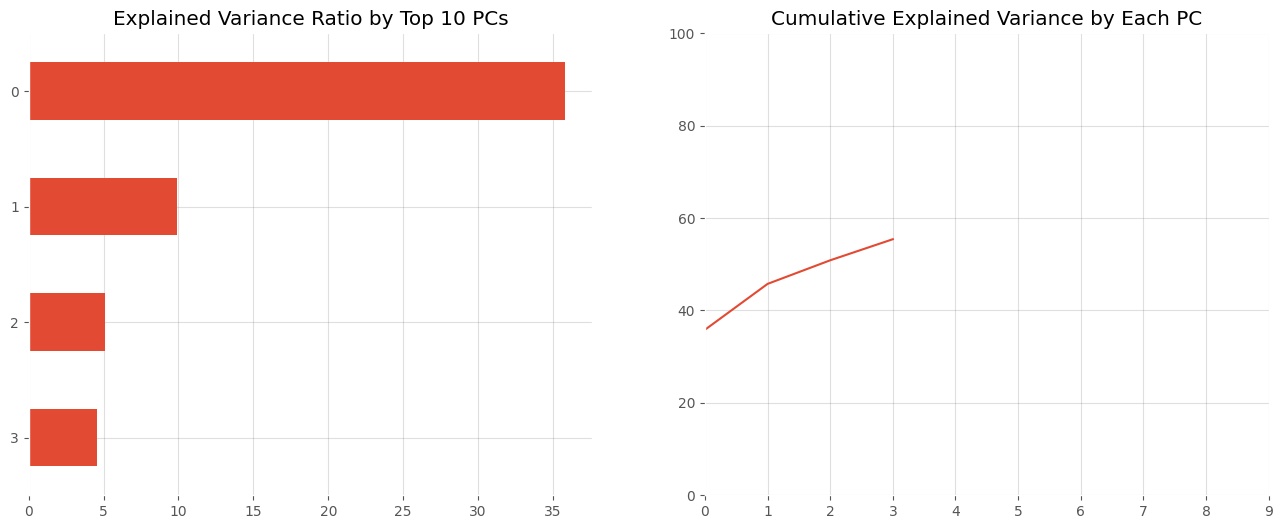

In [18]:
fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [19]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

In [20]:
weights = PCWeights()

In [21]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [22]:
def valid_backtest_PCA_porfolios(eigen):
    
    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    # Sanity Check: Ensure the order of tickers in X_Test_Raw matches the order in eigen
    if not list(eigen_prtfi.index) == list(X_Test_Raw.columns): 
        raise ValueError("Sanity check failed: Mismatch in number of tickers between X_Test_Raw and eigen.")
    else:
        print("Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.")
    
    # Let's directly compute the dot product without sorting
    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw, eigen)
    )
    
    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

In [23]:
# Set the number of principal components to be considered
NumComponents = 4

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = scaled_prices.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([4.018, 2.115, 1.517, 1.434, 1.288, 1.214, 1.193, 1.168, 1.089,
       1.062, 0.995, 0.985, 0.937, 0.889, 0.859, 0.844, 0.841, 0.802,
       0.778, 0.7  , 0.697, 0.664, 0.618, 0.598, 0.578, 0.544, 0.524,
       0.498, 0.479, 0.459, 0.422, 0.397, 0.374, 0.354, 0.336, 0.332,
       0.277, 0.271, 0.241, 0.195])

### <font color = red> Answer 1 is presented in the cell below: </font>

array([[<Axes: title={'center': 'Portfolio 0'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 1'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 2'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 3'}, xlabel='Ticker'>]],
      dtype=object)

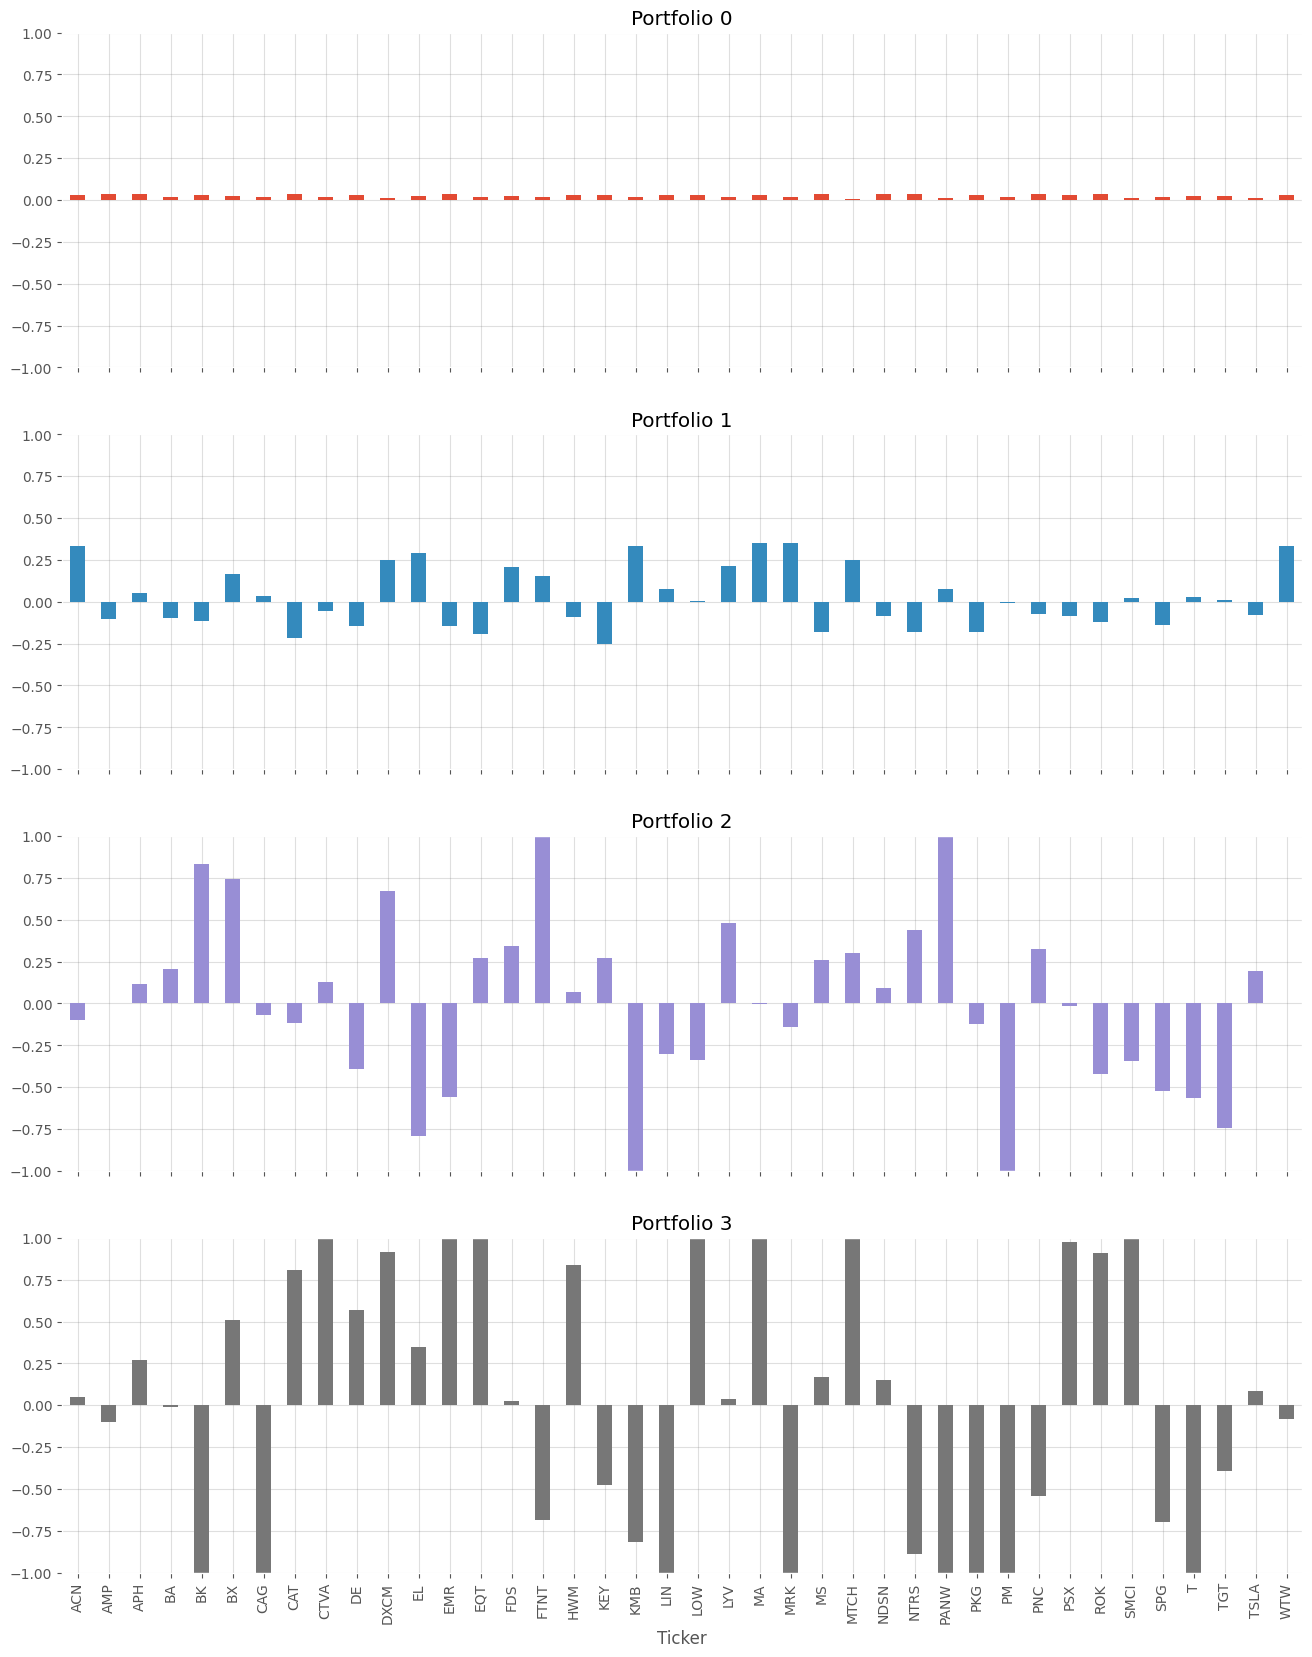

In [24]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )
)

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = 27.26%
Volatility = 7.57%
Sharpe = 3.60


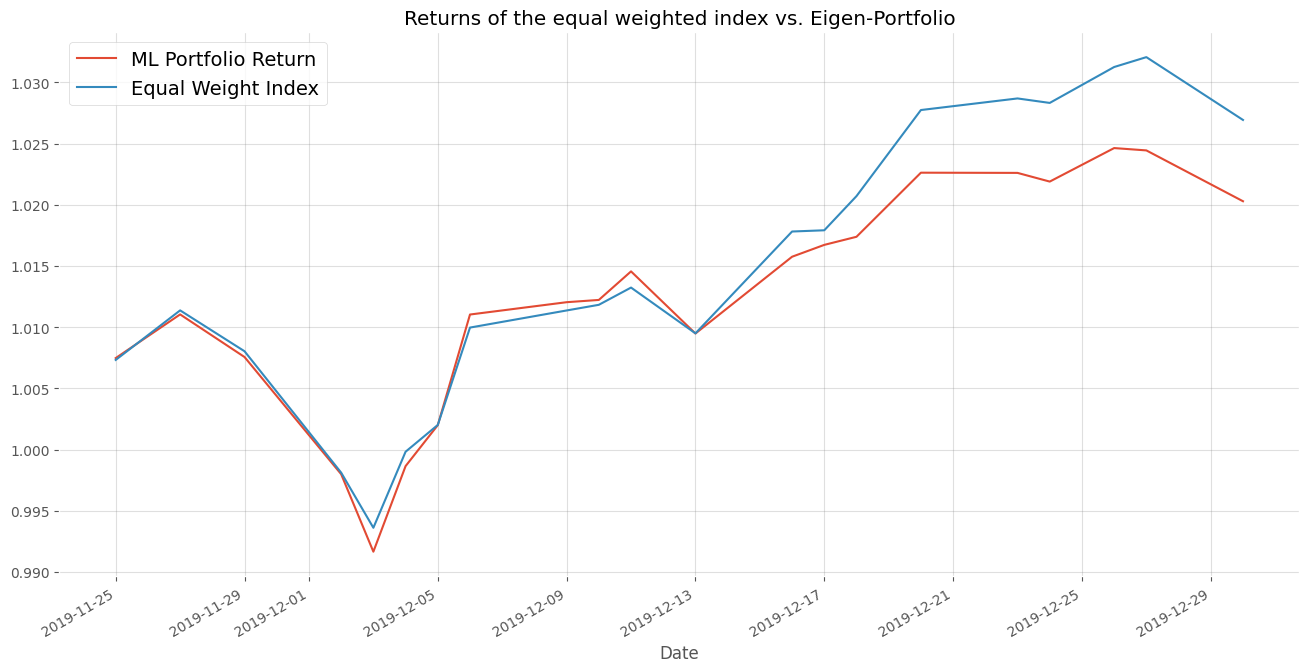

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = 145.39%
Volatility = 27.15%
Sharpe = 5.35


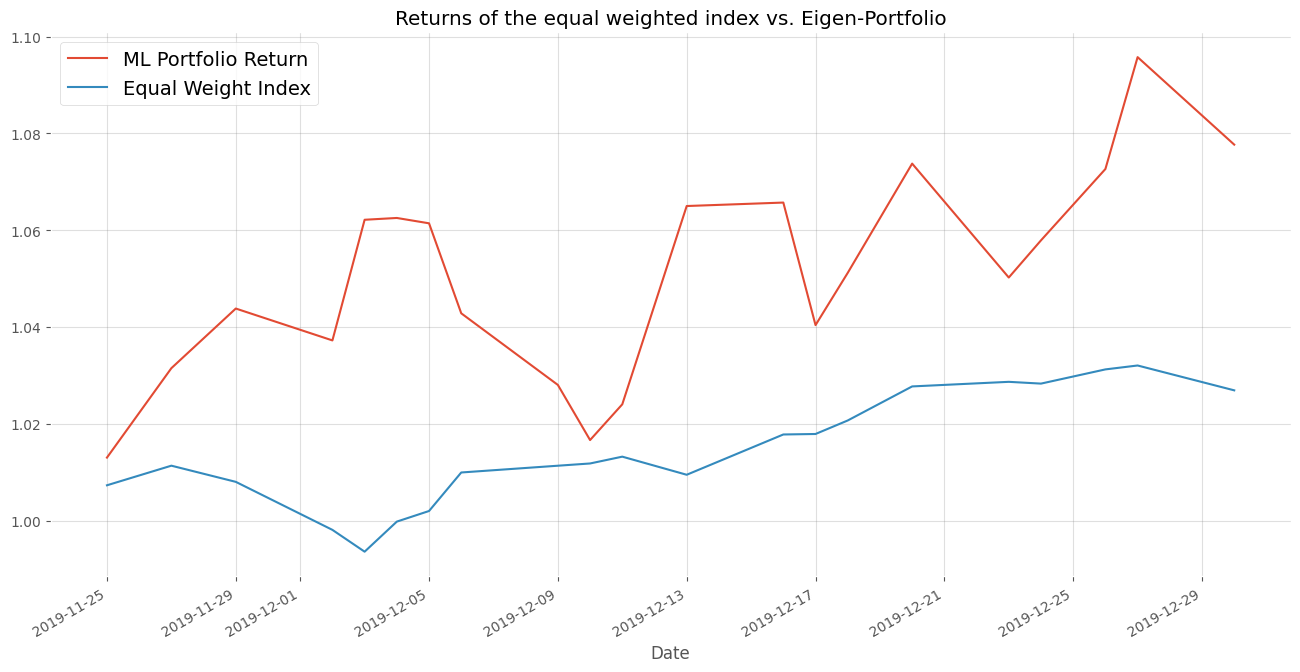

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = 255.21%
Volatility = 77.54%
Sharpe = 3.29


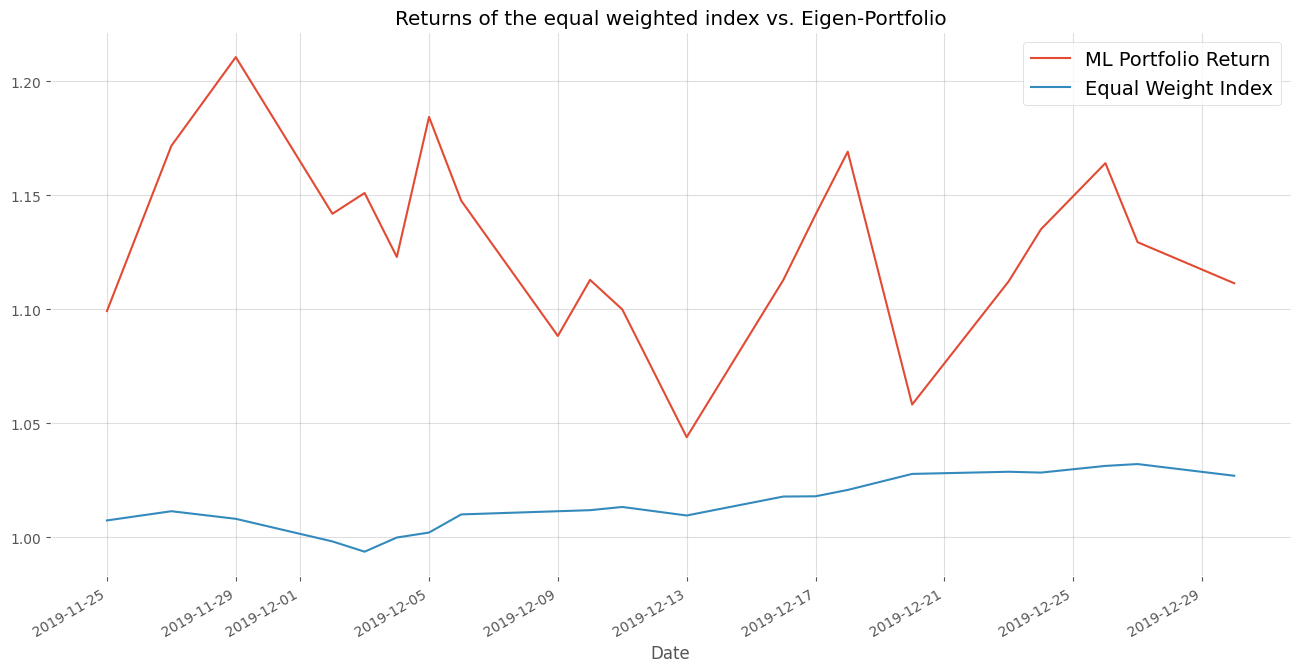

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = 6228.24%
Volatility = 169.18%
Sharpe = 36.81


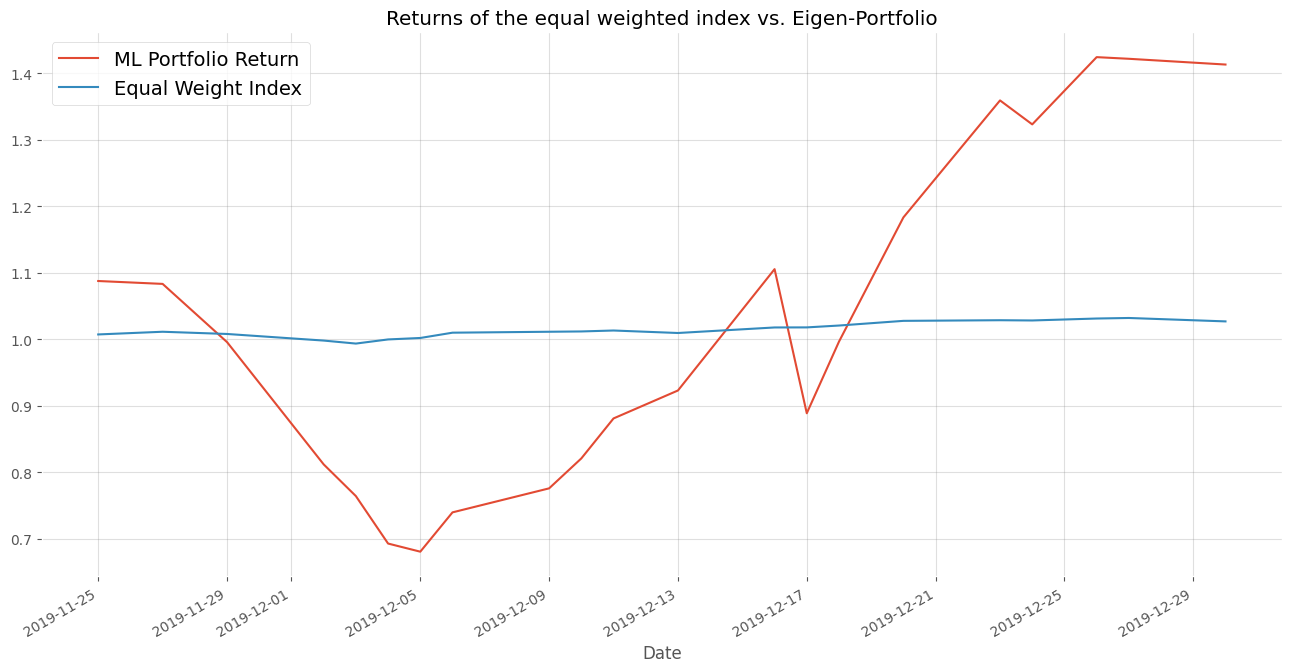

In [25]:
for i in range(4):
    valid_backtest_PCA_porfolios(
        eigen = weights[i]
    )

## 👇 <font color = "purple"> Bigger Question 2. The next question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).

> The primary advantage AGNES has over other clustering methods is that you don’t need to guess how many clusters there might be.
    
> Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It’s then up to a quant to choose a cut-off threshold and decide how many clusters are present.

> Linkage does the actual clustering in one line of code, and returns a list of the clusters.

> There are different options for measuring the distance. We will choose the average distance measurement option, but others are possible (ward, single, centroid, etc.).

### The best way to visualize an agglomerate clustering algorithm is through a dendrogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. 
    
### The distance between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.
    
### <font color = green> Using Dow data, based on what you learned in class, run the above analysis and come up with a dendrogram. According to the dendrogram, which of the stocks are most correlated? Also based on the dendrogram, please identify two stocks that are not well correlated.

### Below are the lines of code that lead to an answer:

In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

In [27]:
dow =\
(
    pd
    .read_csv("https://talktoroh.squarespace.com/s/dow_pca-hemx.csv",
              index_col = 0)
)

In [28]:
# Checking for any null values and removing missing values

print("Missing Values? =", 
      dow
          .isnull()
          .values
          .any()
     )

Missing Values? = True


In [29]:
missing_fractions = \
    dow \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

In [30]:
missing_fractions.head(10)

DWDP    0.925208
V       0.429792
MMM     0.000000
JPM     0.000000
WMT     0.000000
VZ      0.000000
UNH     0.000000
UTX     0.000000
TRV     0.000000
PG      0.000000
dtype: float64

In [31]:
drop_list =\
    sorted(list(missing_fractions
                [missing_fractions > 0.3]
                .index)
           )

In [32]:
dataset =\
    dow \
    .drop(labels= drop_list, 
          axis=1)

In [33]:
# Fill the missing values with the last value available in the dataset. 

dataset = dataset.fillna(method = "ffill")
dataset.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,23.862240,...,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,23.405167,...,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,24.569179,...,37.235380,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,25.958680,...,35.988857,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,25.882501,...,36.459983,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,48.535033,21.051805


In [34]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    dataset
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [35]:
returns["Volatility"] =\
(    
     dataset
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns.copy()

In [36]:
returns

,Returns,Volatility
MMM,0.126309,0.229568
AXP,0.118604,0.354868
AAPL,0.290322,0.409492
BA,0.185365,0.299863
CAT,0.167952,0.321688
CVX,0.119901,0.254099
CSCO,0.080959,0.391052
KO,0.075859,0.205860
DIS,0.126220,0.298514
XOM,0.087974,0.241293


In [37]:
# You may format the data as a numpy array to feed into the K-Means algorithm

data =\
( 
    np 
    .asarray([np.asarray(returns['Returns']),
              np.asarray(returns['Volatility'])
             ]
            )
    .T
)

In [38]:
data

array([[0.126, 0.23 ],
       [0.119, 0.355],
       [0.29 , 0.409],
       [0.185, 0.3  ],
       [0.168, 0.322],
       [0.12 , 0.254],
       [0.081, 0.391],
       [0.076, 0.206],
       [0.126, 0.299],
       [0.088, 0.241],
       [0.121, 0.371],
       [0.122, 0.309],
       [0.06 , 0.259],
       [0.095, 0.371],
       [0.099, 0.191],
       [0.147, 0.392],
       [0.131, 0.23 ],
       [0.08 , 0.271],
       [0.1  , 0.306],
       [0.195, 0.3  ],
       [0.08 , 0.248],
       [0.08 , 0.21 ],
       [0.137, 0.289],
       [0.126, 0.266],
       [0.25 , 0.314],
       [0.077, 0.247],
       [0.065, 0.239],
       [0.101, 0.275]])

In [39]:
scaler = StandardScaler().fit(data)

In [40]:
rescaledDataset =\
(
    pd
    .DataFrame(scaler.fit_transform(data),
               columns = returns.columns, 
               index = returns.index)
)
rescaledDataset.head()

,Returns,Volatility
MMM,0.060722,-1.009566
AXP,-0.084588,1.115765
AAPL,3.153598,2.042296
BA,1.174373,0.182784
CAT,0.846008,0.552976


In [41]:
# summarize transformed data
X = rescaledDataset
X.head()

,Returns,Volatility
MMM,0.060722,-1.009566
AXP,-0.084588,1.115765
AAPL,3.153598,2.042296
BA,1.174373,0.182784
CAT,0.846008,0.552976


In [42]:
#Calulate linkage
Z = linkage(X, 
            method = "average")
Z[0]


array([20.   , 25.   ,  0.044,  2.   ])

### <font color = red> Answer 2 is presented in the cell below: </font>

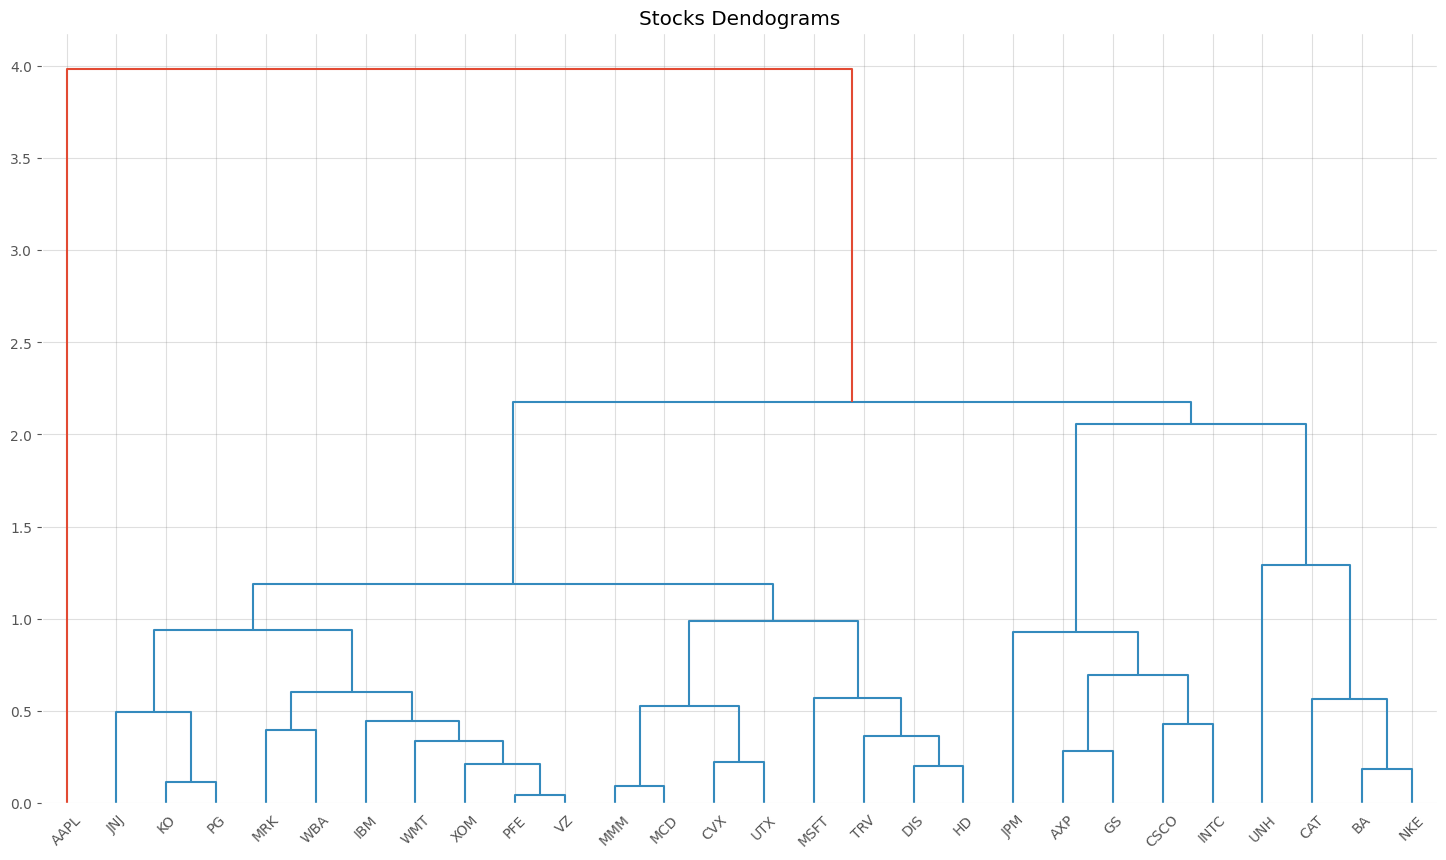

In [43]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

## <font color = blue> 👉 Questions 3 to 7 ask you to build, execute, and backtest a strategy, using both `MACD` and `RSI`. </font>

### <font color = green> Please combine the RSI and MACD strategies and own the stock if both RSI and MACD criteria provide a signal to buy. As to RSI, you will generalize the RSI threshold values to 50.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Microsoft (`MSFT`) is our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position under a condition where RSI is below 50 and, at the same time, bullish crossover based on MACD is accomplished.
<br>
    
- Enter a short position under a condition where RSI is above 50 and, at the same time, bearish crossover based on MACD is accomplished.

### <font color = green> NOTE: The MACD crossover strategy is defined as:    
    
- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.        
<br>

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.
    
### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period 
    and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and 
    each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for 
    the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value 
    to calculate the nextaverage value by multiplying by our lookback 
    period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value 
    (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [44]:
class ticker_info:
    def __init__(
            self,
            tickers: list[str]
        ) -> None:
        """
        Retrieves ticker related information

        Parameters
        ----------
        tickers : list[str]
            List of tickers
        """
        
        self.tickers = tickers
        self.price = None

    def download(
        self, 
        start_date: str, 
        end_date: str,
        variable: str
    ) -> None:
        """
        Download Adj Close from Yahoo Finance
        Updates self.price variable

        Parameters
        ----------
        start_date : str
            Start Date
        end_date : str
            End Date
        variable : str
            Variable to download ('Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
        """
        self.price = (
            yf.download(
                tickers = self.tickers, 
                start = start_date, 
                end = end_date
            )
            [variable]
        )
        if len(self.tickers) == 1:
            self.price = (
                self.price
                .to_frame()
                .rename(
                    columns = {
                        variable : self.tickers[0]
                    }
                )
            )
    
    def compute_returns(
        self,
        return_type: str
    ) -> pd.DataFrame:
        """
        Calculate Returns

        Parameters
        ----------
        return_type : str
            'simple' or 'log'
            
        Returns
        -------
        pd.DataFrame
            Returns DF based on specified return calculation

        Raises
        ------
        TypeError
            If price variable is None
        """
        return_type = return_type.upper()
        
        if self.price is None:
            raise ValueError('Price data is not available. Run `download()` first')
        
        if return_type == 'SIMPLE':
            returns = (
                self.price
                .pct_change()
            )
        elif return_type == 'LOG':
            returns = (
                np.log(
                    self.price
                )
                .diff()
            )
        else:
            raise ValueError('Invalid return type. Use "simple" or "log".')
        
        return returns

In [45]:
class indicators:
    def __init__(
        self,
        df: pd.DataFrame,
    ) -> None:
        """
        Computes technical indicators

        Parameters
        ----------
        df : pd.DataFrame
            DataFrame of prices with date as index
        """
        self.price = df
        self.df = df
        self.tickers = df.columns
    
    def SMA(
        self,
        windows: list[int]
    ) -> None:
        """
        Compute simple moving average indicator

        Parameters
        ----------
        windows : list[int]
            Rolling windows

        Raises
        ------
        TypeError
            If windows are not integer
        """
        if not isinstance(windows, list):
            raise AttributeError('Expected a list of windows')
                    
        if any(not isinstance(window, int) for window in windows):
            raise TypeError('Specify integer windows')
        
        SMA = (
            pd.concat(
                [
                    self.price
                    .rolling(window = window)
                    .mean()
                    .rename(
                        columns = {
                            ticker : f'SMA_{window}_{ticker}'
                            for ticker in self.tickers
                        }
                    )
                    for window in windows
                ],
                axis = 1
            )
        )
        
        self.df = (
            pd.concat(
                [
                    self.df,
                    SMA   
                ],
                axis = 1
            )
        )
        
    def EWMA(
        self,
        spans: list[int]
    ) -> None:
        """
        Compute exponentially weighted moving average

        Parameters
        ----------
        spans : list[int]
            windows

        Raises
        ------
        TypeError
            If spans are not integer
        """
        if not isinstance(spans, list):
            raise AttributeError('Expected a list of spans')
            
        if any(not isinstance(span, int) for span in spans):
            raise TypeError('Specify integer spans')
        
        EWMA = (
            pd.concat(
                [
                    self.price
                    .ewm(span = span)
                    .mean()
                    .rename(
                        columns = {
                            ticker : f'EWMA_{span}_{ticker}'
                            for ticker in self.tickers
                        }
                    )
                    for span in spans
                ],
                axis = 1
            )
        )
        
        self.df = (
            pd.concat(
                [
                    self.df,
                    EWMA   
                ],
                axis = 1
            )
        )
    
    def RSI(
        self,
        n: int
    ) -> None:
        """
        Relative strength index

        Parameters
        ----------
        n : int
            window

        Raises
        ------
        TypeError
            If n is not integer
        """
        if not isinstance(n, int):
            raise TypeError('Specify integer window')
        
        delta = (
            self.price
            .diff()
        )
        
        gain = (
            delta
            .where(
                delta > 0,
                0
            )
            .rolling(window = n)
            .mean()
        )
        
        loss = (
            delta
            .where(
                delta < 0,
                0
            )
            .abs()
            .rolling(window = n)
            .mean()
        )
        
        RS = gain / loss
        
        RSI = 100 - 100 / (1 + RS)
        
        RSI = (
            RSI
            .rename(
                columns = {
                    ticker : f'RSI_{n}_{ticker}'
                    for ticker in self.tickers
                }
            )
        )

        self.df = (
            pd.concat(
                [
                    self.df,
                    RSI   
                ],
                axis = 1
            )
        )
        
    def MACD(
        self,
        short: int,
        long: int,
        signal: int
        ) -> None:
        """_summary_

        Parameters
        ----------
        short : int
            Short Window
        long : int
            Long Window
        signal : int
            MACD window

        Raises
        ------
        TypeError
            If any short, long or signal is not integer
        """
        if any([not isinstance(n, int) for n in [short, long, signal]]):
            raise TypeError('Specify integer window')
        
        short_ewma = (
            self.price
            .ewm(span = short)
            .mean()
        )
        
        long_ewma = (
            self.price
            .ewm(span = long)
            .mean()
        )
        
        MACD = short_ewma - long_ewma
        
        MACD = (
            MACD
            .rename(
                columns = {
                    ticker : f'MACD_{ticker}'
                    for ticker in self.tickers
                }
            )
        )
        
        signal_line = (
            MACD
            .ewm(span = signal)
            .mean()
            .rename(
                columns = {
                    f'MACD_{ticker}' : f'signal_line_{ticker}'
                    for ticker in self.tickers
                }
            )
        )
        
        self.df = (
            pd.concat(
                [
                    self.df,
                    MACD,
                    signal_line   
                ],
                axis = 1
            )
        )
    
    def compute(
        self, 
        indicator: str,
        **kwargs
    ) -> None:
        """
        Computes specified indicators

        Parameters
        ----------
        indicator : str
            Name of indicator to compute

        Raises
        ------
        ValueError
            If indicator is not recognized
        """
        indicator = indicator.upper()
        
        if hasattr(self, indicator):
            getattr(self, indicator)(**kwargs)
        else:
            raise ValueError(f"indicator '{indicator}' is not recognized.")

In [46]:
class plotting:
    def __init__(
        self,
        df: pd.DataFrame
    ) -> None:
        """
        Plotting class

        Parameters
        ----------
        df : pd.DataFrame
            DataFrame to plot
        """
        self.df = df
        
        
    def signal(
        self,
        ticker: str,
        y: list[str],
        color: list[str],
        plot_type: str
    ) -> None:
        
        if not isinstance(y, list):
            raise AttributeError('Expected a list of y')
        if not any(v for v in y if v in self.df.columns):
            raise KeyError(f'{y} not in DataFrame')
        if plot_type not in self.df.columns:
            raise KeyError(f'Define {plot_type} first')
        if len(y) != len(color):
            raise ValueError('Length of `y` must be equal to the length of `color`')
        
        indicators = (
            self.df
            [plot_type]
            .unique()
        )
        
        long = indicators[indicators > 0].item()
        short = indicators[indicators < 0].item()
        
        (
            self.df
            [y]
            .plot(
                figsize = (16,6),
                color = color
            )
        )

        # BUY signal
        (
            plt
            .scatter(
                self.df.loc[self.df[plot_type] == long].index,
                self.df[self.df[plot_type] == long][y[0]],
                marker = '^',
                s = 100,
                color = "green",
                )
        )

        # SELL signal
        (
            plt
            .scatter(
                self.df.loc[self.df[plot_type] == short].index,
                self.df[self.df[plot_type] == short][y[0]],
                marker = 'v',
                s = 100,
                color = "red",
                )
        )
        
        plt.title(f'{ticker} {plot_type}')


In [47]:
class backtest:
    def __init__(
        self,
        dates: np.array,
        capital: int,
        commissions: int,
        positions_arr: np.array,
        prices_arr: np.array
    ) -> None:
        self.capital = capital
        self.commissions = commissions
        self.date = dates
        self.position = positions_arr
        self.prices = prices_arr
        self.trade_days = len(prices_arr)
        
        if len(positions_arr) != len(prices_arr):
            raise ValueError('check length of positions and prices')
        
    def run(
        self,
        shares_to_buy: int = None
    ) -> pd.DataFrame:
        """
        compute portfolio value

        Parameters
        ----------
        shares_to_buy : int, optional
            indicate shares to buy else entire capital will be used, by default None

        Returns
        -------
        pd.DataFrame
            portfolio
        """
        cash = np.zeros(self.trade_days)
        shares = np.zeros(self.trade_days)
        holdings = np.zeros(self.trade_days)
        commissions = np.zeros(self.trade_days)
        total = np.zeros(self.trade_days)
        
        cash[0] = self.capital
        total[0] = self.capital
        
        for i in range(1, self.trade_days):
            if self.position[i] == 1 and self.position[i - 1] == 0:
                shares[i] = (cash[i - 1] - self.commissions) / self.prices[i] if shares_to_buy is None else shares_to_buy
                commissions[i] = commissions[i - 1] + self.commissions
                cash[i] = cash[i - 1] - shares[i] * self.prices[i]
            elif self.position[i] == -1 and self.position[i - 1] == 0:
                shares[i] = -(cash[i - 1] - self.commissions) / self.prices[i] if shares_to_buy is None else -shares_to_buy
                commissions[i] = commissions[i - 1] + self.commissions
                cash[i] = cash[i - 1] - shares[i] * self.prices[i]
                
            elif self.position[i] == 1 and self.position[i - 1] == -1:
                cash[i] = cash[i - 1] + shares[i - 1] * self.prices[i]
                shares[i] = (cash[i] - self.commissions) / self.prices[i] if shares_to_buy is None else shares_to_buy
                commissions[i] = commissions[i - 1] + self.commissions
                cash[i] = cash[i] - shares[i] * self.prices[i]
                
            elif self.position[i] == -1 and self.position[i - 1] == 1:
                cash[i] = cash[i - 1] + shares[i - 1] * self.prices[i]
                shares[i] = -(cash[i] - self.commissions) / self.prices[i] if shares_to_buy is None else -shares_to_buy
                commissions[i] = commissions[i - 1] + self.commissions
                cash[i] = cash[i] - shares[i] * self.prices[i]
            else:
                cash[i] = cash[i - 1]
                shares[i] = shares[i - 1]
                holdings[i] = shares[i] * self.prices[i]
                commissions[i] = commissions[i - 1]
            
            holdings[i] = shares[i] * self.prices[i]
            total[i] = cash[i] + holdings[i] - commissions[i]
            
        result = (
            pd.DataFrame(
                {
                    'Date': self.date,
                    'price': self.prices,
                    'trading_direction': self.position,
                    'our_cash': cash,
                    'shares': shares,
                    'our_holdings': holdings,
                    'commissions': commissions,
                    'total': total
                }
            )
        )
        
        result['returns'] = (
            result
            ['total']
            .pct_change()
            .fillna(0)
        )
        
        result['cumulative_returns'] = (
            (
                result['returns']
                + 1
            )
            .cumprod()
        )
        
        result = result.set_index('Date')
        
        return result
        

In [48]:
class performance:
    def __init__(
        self,
        df: pd.DataFrame,
        trading_days: int,
        return_type: str
    ) -> None:
        self.df = df
        self.trading_days = trading_days
        self.n_years = len(df)
        self.return_type = return_type.upper()
        
        if self.return_type not in ['SIMPLE', 'GEOMETRIC']:
            raise ValueError('Invalid return type. Use "simple" or "geometric".')
        if 'returns' not in df.columns:
            raise KeyError('returns column not found')
        
        self.returns = df['returns'].values
        self.df['cumlative_returns'] = (1 + self.df['returns']).cumprod()
    
    def annualized_returns(
        self
    ) -> float:
        """
        Computes annualized returns using simple or geometric

        Returns
        -------
        float
            annualized returns
        """
        if self.return_type == 'GEOMETRIC':
            annualized_return = (
                np.power(
                    np.prod(1 + self.returns), 
                    (1 / self.n_years)
                ) - 1
            )
            
        elif self.return_type == 'SIMPLE':          
            annualized_return = (
                self.returns
                .mean()
                * self.trading_days
            )
        
        return annualized_return
    
    def annualized_volatility(
        self
    ) -> float:
        """
        Computes annualzied volatility

        Returns
        -------
        float
            annualized volatility
        """
        vol = self.returns.std() * np.sqrt(self.trading_days) 
        return vol
    
    def sharpe(
        self,
        ) -> float:
        """
        Computes annualized sharpe

        Returns
        -------
        float
            annualized sharpe
        """
        returns = self.annualized_returns()
        vol = self.annualized_volatility()

        annualized_sharpe = returns / vol

        return annualized_sharpe
    
    def drawdown(
        self
    ) -> dict[float, int]:
        """
        computes list of drawdowns

        Returns
        -------
        dict[float, int]
            Dictionary with drawdown respective drawdown days
            sorted by highest drawdwon first
        """
        self.df['max_gross_return'] = self.df['cumulative_returns'].cummax()
        self.df['drawdown'] = (self.df['cumulative_returns'] / self.df['max_gross_return']) - 1

        drawdown_reset = self.df[self.df['drawdown'] == 0].index
        drawdown_reset = (
            np.append(
                drawdown_reset,
                self.df.index[-1:]
            )
        )

        drawdowns = {}
        for i in range(1, len(drawdown_reset)):
            filtered_df = (
                self.df
                [
                    (self.df.index >= drawdown_reset[i-1])
                    &
                    (self.df.index <= drawdown_reset[i])
                ]
            )
            
            mdd = filtered_df['drawdown'].min()
            duration = (drawdown_reset[i] - drawdown_reset[i-1]) / np.timedelta64(1, 'D')

            drawdowns[mdd] = duration
        
        sorted_drawdown = dict(sorted(drawdowns.items()))
        
        return sorted_drawdown
    
    def annual_returns(
        self
    ) -> pd.DataFrame:
        """
        Computes portfolio annual returns

        Returns
        -------
        pd.DataFrame
            DataFrame with annual returns and average annual returns
        """
        self.df['year'] = self.df.index.year

        portfolio_by_year = (
            self.df
            .groupby('year')
            .agg(
                end = ('cumulative_returns', 'last')
            )
        )

        portfolio_by_year['returns'] = (
            portfolio_by_year
            ['end']
            .pct_change()
        )

        portfolio_by_year['avg'] = portfolio_by_year['returns'].mean()
        
        return portfolio_by_year

In [49]:
base = (
    ticker_info(
        tickers = ['MSFT']
    )
)

base.download(
    start_date = '2014-12-31',
    end_date = '2017-12-31',
    variable = 'Adj Close'
)

[*********************100%***********************]  1 of 1 completed


In [50]:
strat = indicators(
    df = base.price
)

strat.compute(
    indicator = 'RSI',
    n = 14
)

strat.compute(
    indicator = 'MACD',
    short = 12,
    long = 26,
    signal = 9
)

MSFT = strat.df.copy()

MSFT['MACD_signal_MSFT'] = (
    np.where(
        (MSFT['MACD_MSFT'] > MSFT['signal_line_MSFT']) &
        (MSFT['MACD_MSFT'].shift(1) < MSFT['signal_line_MSFT'].shift(1)),
        1, np.nan
    )
)

MSFT['MACD_signal_MSFT'] = (
    np.where(
        (MSFT['MACD_MSFT'] < MSFT['signal_line_MSFT']) &
        (MSFT['MACD_MSFT'].shift(1) > MSFT['signal_line_MSFT'].shift(1)),
        -1, MSFT['MACD_signal_MSFT']
    )
)

MSFT['RSI_signal_MSFT'] = (
    np.where(
        MSFT['RSI_14_MSFT'] < 50,
        1,
        -1
    )
)

MSFT['trading_position'] = (
    np.where(
        (MSFT['MACD_signal_MSFT'] == 1)
        &
        (MSFT['RSI_signal_MSFT'] == 1),
        1, np.nan
    )
)

MSFT['trading_position'] = (
    np.where(
        (MSFT['MACD_signal_MSFT'] == -1)
        &
        (MSFT['RSI_signal_MSFT'] == -1),
        -1, MSFT['trading_position']
    )
)

MSFT['trading_position'] = (
    MSFT['trading_position']
    .ffill()
)

MSFT['signal'] = (
    MSFT['trading_position']
    .diff()
    .fillna(0)
)

### <font color = red> Answer 3 is presented in the cell below: </font>

In [51]:
MSFT

,MSFT,RSI_14_MSFT,MACD_MSFT,signal_line_MSFT,MACD_signal_MSFT,RSI_signal_MSFT,trading_position,signal
Date,,,,,,,,
2014-12-31,39.966129,NaN,0.000000,0.000000,NaN,-1,NaN,0.0
2015-01-02,40.232853,NaN,0.005984,0.003325,NaN,-1,NaN,0.0
2015-01-05,39.862885,NaN,-0.003848,0.000385,-1.0,-1,-1.0,0.0
2015-01-06,39.277802,NaN,-0.029349,-0.009688,NaN,-1,-1.0,0.0
2015-01-07,39.776844,NaN,-0.022731,-0.013568,NaN,-1,-1.0,0.0
...,...,...,...,...,...,...,...,...
2017-12-22,79.384438,73.340446,0.895668,0.898258,-1.0,-1,-1.0,0.0
2017-12-26,79.282310,70.957053,0.845591,0.887725,NaN,-1,-1.0,0.0
2017-12-27,79.570107,67.844030,0.819679,0.874116,NaN,-1,-1.0,0.0


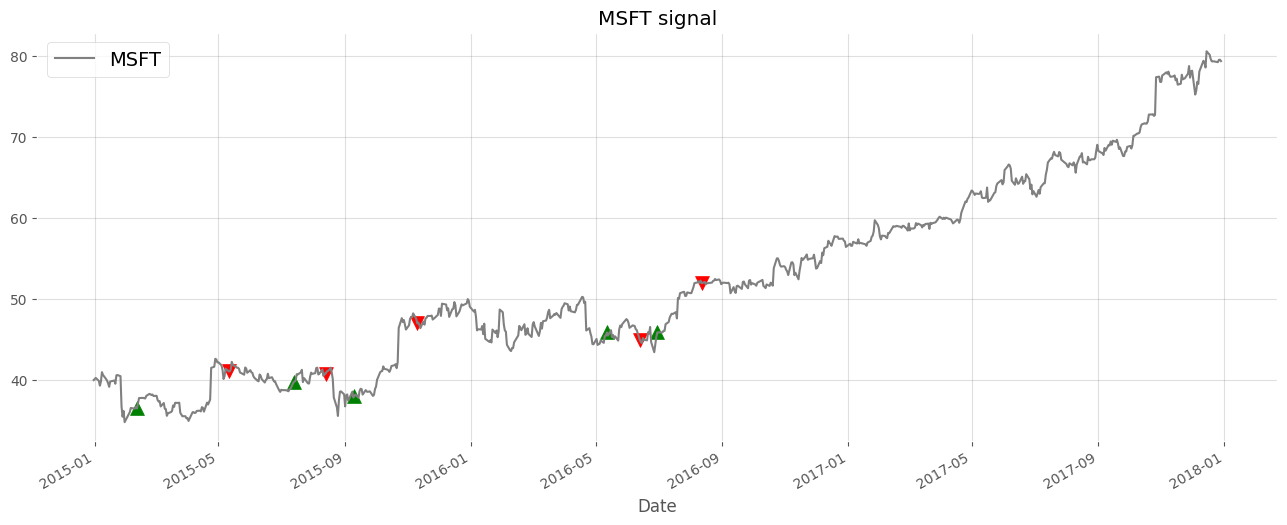

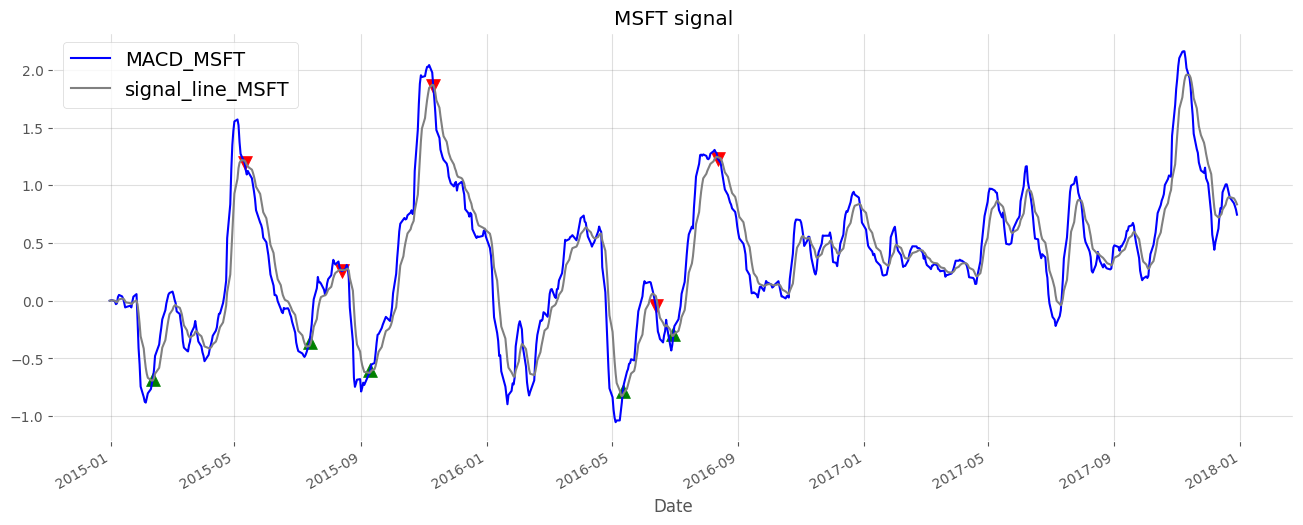

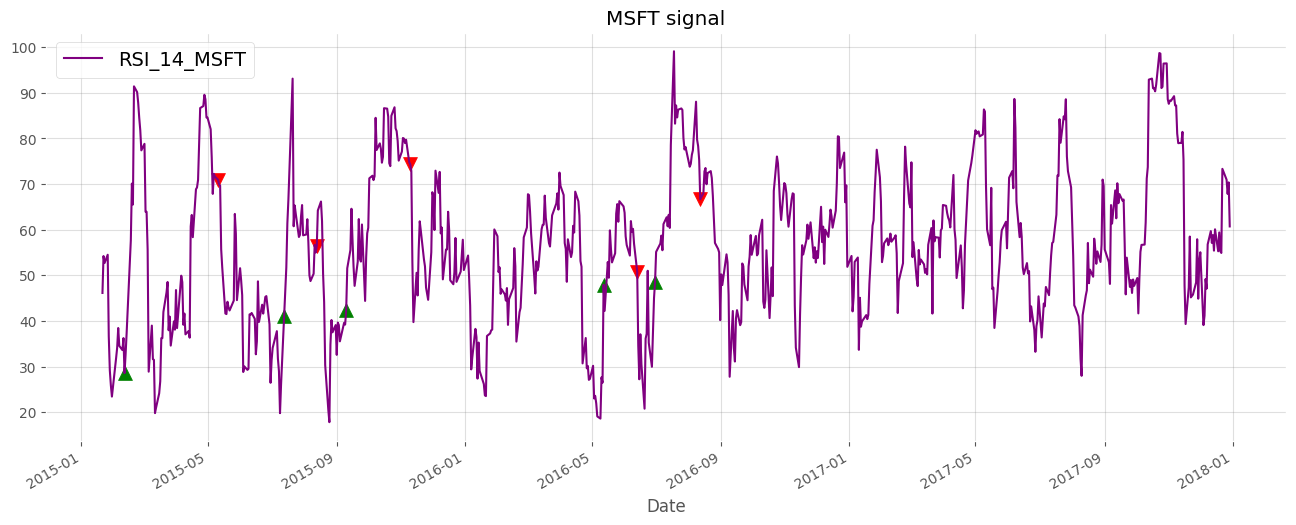

In [52]:
plots = plotting(
    df = MSFT
)

plots.signal(
    ticker = 'MSFT',
    y = ['MSFT'],
    color = ['grey'],
    plot_type = 'signal'
)

plots.signal(
    ticker = 'MSFT',
    y = ['MACD_MSFT', 'signal_line_MSFT'],
    color = ['blue', 'grey'],
    plot_type = 'signal'
)

plots.signal(
    ticker = 'MSFT',
    y = ['RSI_14_MSFT'],
    color = ['purple'],
    plot_type = 'signal'
)

### <font color = blue> 👉 Question 4</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [53]:
bt = (
    backtest(
        dates = MSFT.index,
        capital = 1e5,
        commissions = 5,
        positions_arr = MSFT['trading_position'].values,
        prices_arr = MSFT['MSFT'].values      
    )
)

In [54]:
portfolio = bt.run(shares_to_buy = 1_000)
portfolio

,price,trading_direction,our_cash,shares,our_holdings,commissions,total,returns,cumulative_returns
Date,,,,,,,,,
2014-12-31,39.966129,NaN,100000.000000,0.0,0.000000,0.0,100000.000000,0.000000,1.000000
2015-01-02,40.232853,NaN,100000.000000,0.0,0.000000,0.0,100000.000000,0.000000,1.000000
2015-01-05,39.862885,-1.0,100000.000000,0.0,0.000000,0.0,100000.000000,0.000000,1.000000
2015-01-06,39.277802,-1.0,100000.000000,0.0,0.000000,0.0,100000.000000,0.000000,1.000000
2015-01-07,39.776844,-1.0,100000.000000,0.0,0.000000,0.0,100000.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2017-12-22,79.384438,-1.0,175974.304199,-1000.0,-79384.437561,50.0,96539.866638,-0.000096,0.965399
2017-12-26,79.282310,-1.0,175974.304199,-1000.0,-79282.310486,50.0,96641.993713,0.001058,0.966420
2017-12-27,79.570107,-1.0,175974.304199,-1000.0,-79570.106506,50.0,96354.197693,-0.002978,0.963542


### <font color = red> Answer 4 </font>

    The answer is ____________ % .

### <font color = blue> 👉 Question 5</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [55]:
perf = performance(
    df = portfolio,
    trading_days = 252,
    return_type = 'simple'
)

drawdowns = perf.drawdown()

In [56]:
counter = 0
for i, j in drawdowns.items():
    if counter !=5:
        print(f'{counter+1} worst drawdown period: Net drawdown {round(i*100, 2)}% | Duration: {int(j)} Days')
        counter +=1
    else:
        break

1 worst drawdown period: Net drawdown -23.9% | Duration: 476 Days
2 worst drawdown period: Net drawdown -5.49% | Duration: 162 Days
3 worst drawdown period: Net drawdown -3.54% | Duration: 68 Days
4 worst drawdown period: Net drawdown -3.37% | Duration: 15 Days
5 worst drawdown period: Net drawdown -3.29% | Duration: 60 Days


### <font color = red> Answer 5 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 6</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [57]:
perf.annual_returns()

,end,returns,avg
year,,,
2014,1.000000,NaN,-0.000507
2015,1.165865,0.165865,-0.000507
2016,1.194957,0.024953,-0.000507
2017,0.965120,-0.192339,-0.000507


### <font color = red> Answer 6 </font>

    Below average year(s) : ____________ 
    
    Above average year(s) : ____________ 
     

###  <font color = blue> 👉 Question 7. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [58]:
perf.sharpe()

-0.07904637272113914

### <font color = red> Answer 7 </font>
    
    Sharpe ratio: __________
    

###  <font color = blue> 👉 Question 8. </font> Please compare the above Sharpe ratio deploying RSI-MACD combined strategy, relative to the Sharpe ratio utilizing MACD strategy only. Which investment strategy performs better based on the Sharpe ratio?

### Below are the lines of code that lead to an answer:

In [59]:
MSFT['MACD_trading_position'] = (
    MSFT['MACD_signal_MSFT']
    .ffill()
    .fillna(0)
)

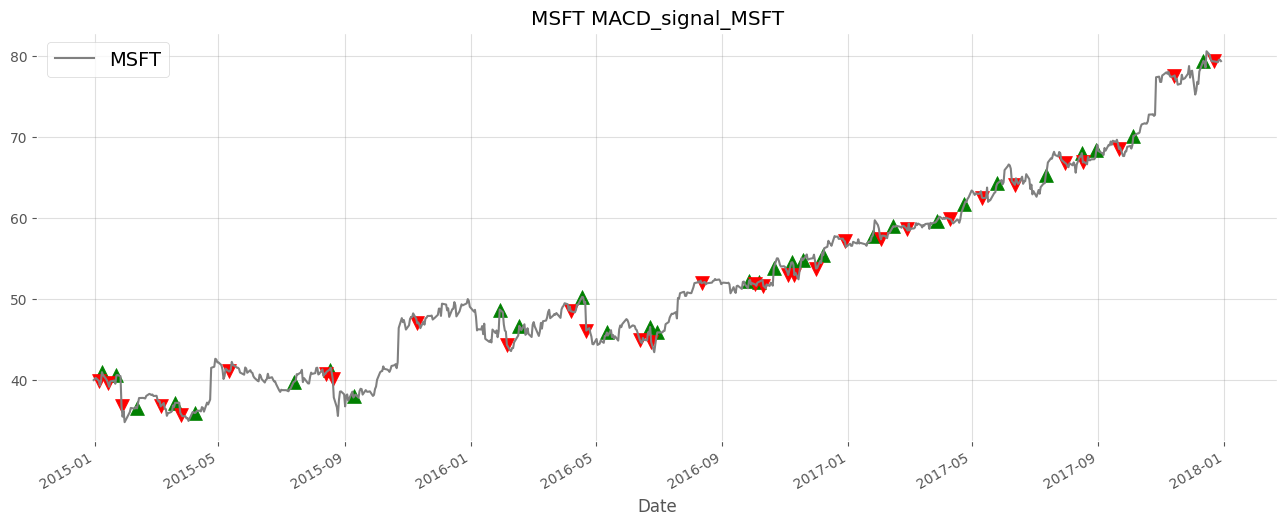

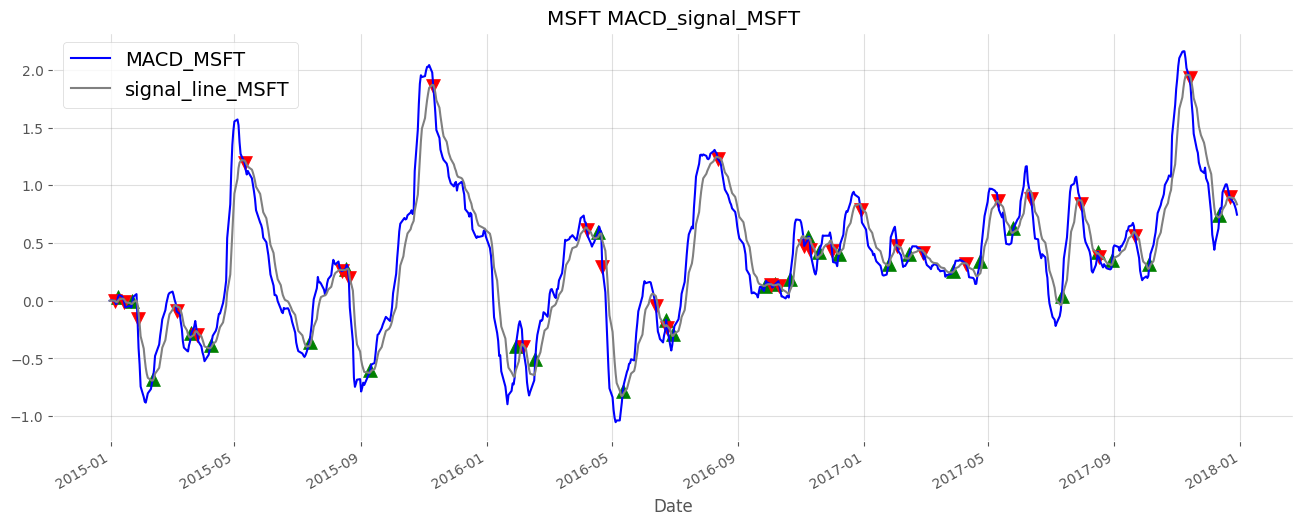

In [60]:
plots = plotting(
    df = MSFT
)

plots.signal(
    ticker = 'MSFT',
    y = ['MSFT'],
    color = ['grey'],
    plot_type = 'MACD_signal_MSFT'
)

plots.signal(
    ticker = 'MSFT',
    y = ['MACD_MSFT', 'signal_line_MSFT'],
    color = ['blue', 'grey'],
    plot_type = 'MACD_signal_MSFT'
)

In [61]:
MACD_bt = (
    backtest(
        dates = MSFT.index,
        capital = 1e5,
        commissions = 5,
        positions_arr = MSFT['MACD_trading_position'].values,
        prices_arr = MSFT['MSFT'].values      
    )
)

MACD_portfolio = MACD_bt.run(
    shares_to_buy = 1_000
)

MACD_portfolio

,price,trading_direction,our_cash,shares,our_holdings,commissions,total,returns,cumulative_returns
Date,,,,,,,,,
2014-12-31,39.966129,0.0,100000.000000,0.0,0.000000,0.0,100000.000000,0.000000,1.000000
2015-01-02,40.232853,0.0,100000.000000,0.0,0.000000,0.0,100000.000000,0.000000,1.000000
2015-01-05,39.862885,-1.0,139862.884521,-1000.0,-39862.884521,5.0,99995.000000,-0.000050,0.999950
2015-01-06,39.277802,-1.0,139862.884521,-1000.0,-39277.801514,5.0,100580.083008,0.005851,1.005801
2015-01-07,39.776844,-1.0,139862.884521,-1000.0,-39776.844025,5.0,100081.040497,-0.004962,1.000810
...,...,...,...,...,...,...,...,...,...
2017-12-22,79.384438,-1.0,158220.802307,-1000.0,-79384.437561,305.0,78531.364746,0.000055,0.785314
2017-12-26,79.282310,-1.0,158220.802307,-1000.0,-79282.310486,305.0,78633.491821,0.001300,0.786335
2017-12-27,79.570107,-1.0,158220.802307,-1000.0,-79570.106506,305.0,78345.695801,-0.003660,0.783457


In [62]:
MACD_perf = (
        performance(
                df = MACD_portfolio,
                trading_days = 252,
                return_type = 'simple'
        )
)

MACD_perf.sharpe()

-0.6160816048343445

### <font color = red> Answer 8 </font>
    
    RSI-MACD strategy performs better.
    

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊